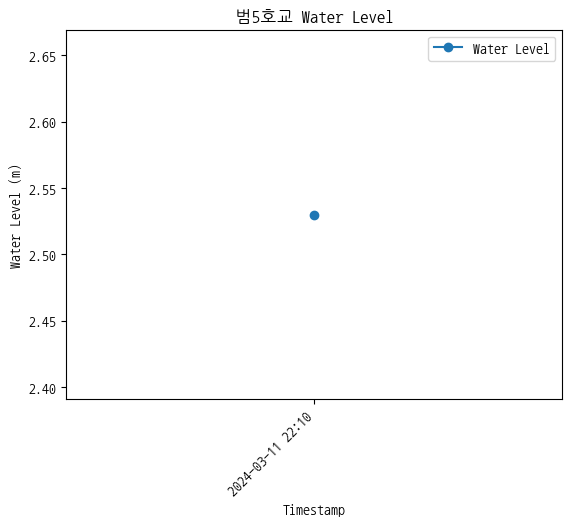

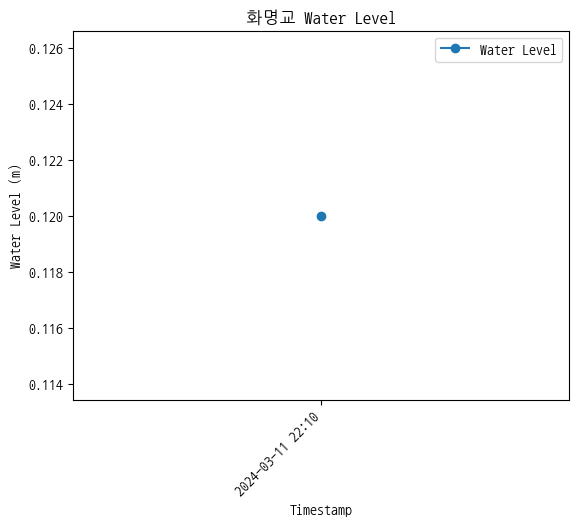

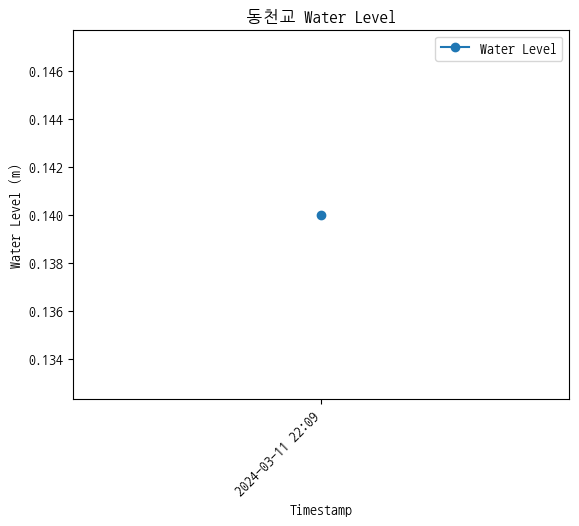

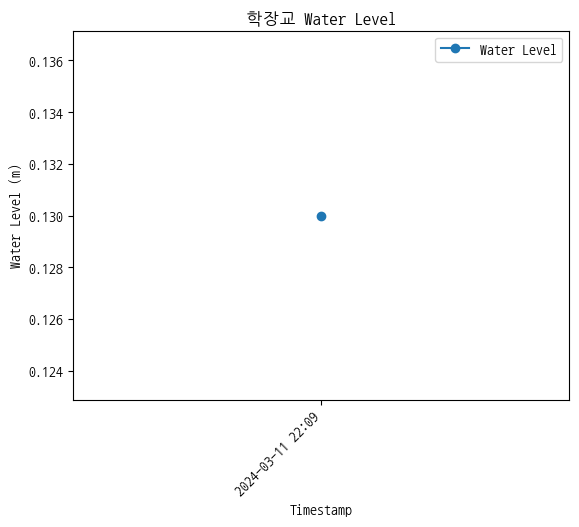

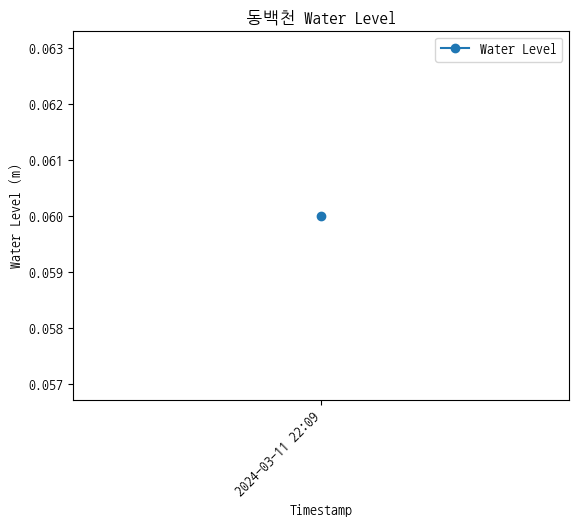

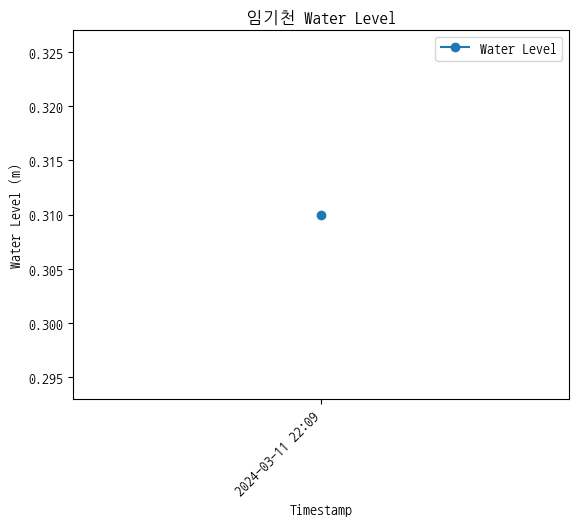

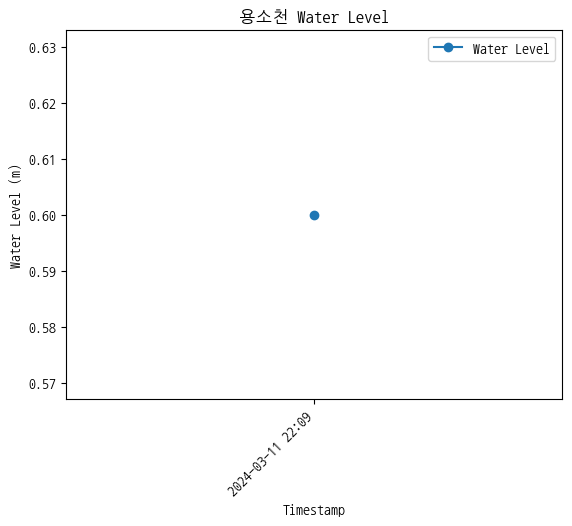

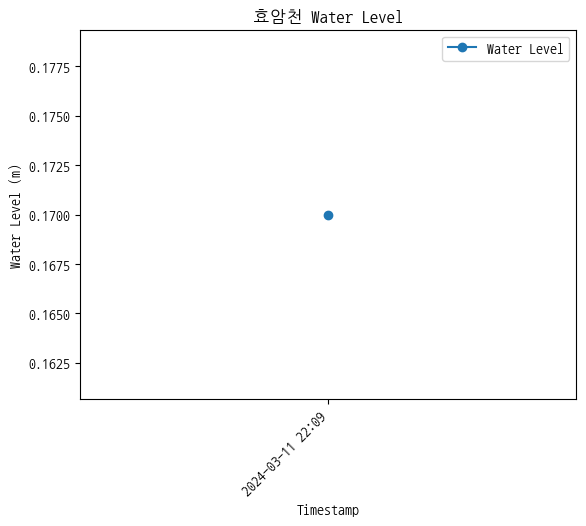

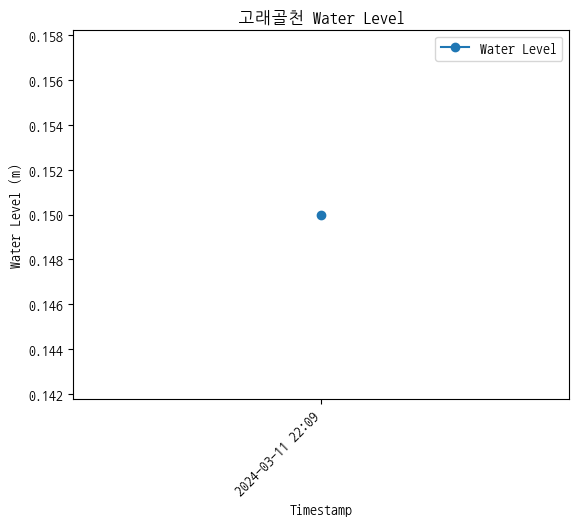

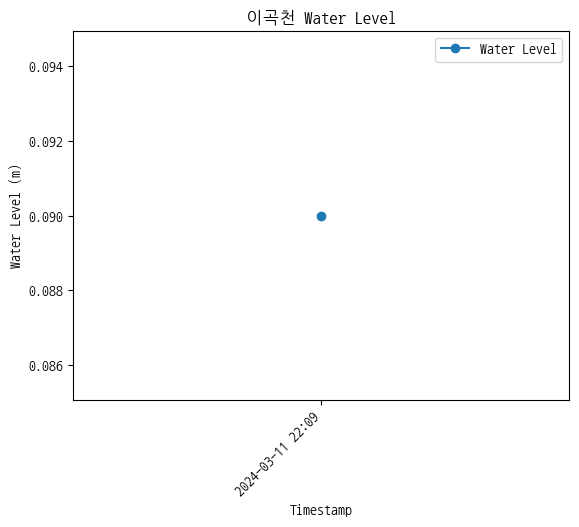

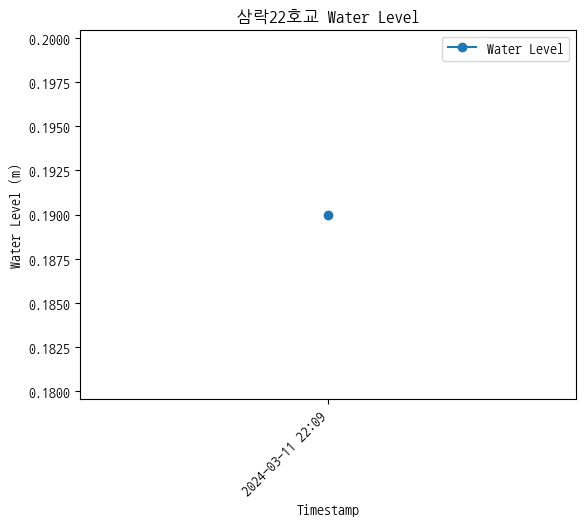

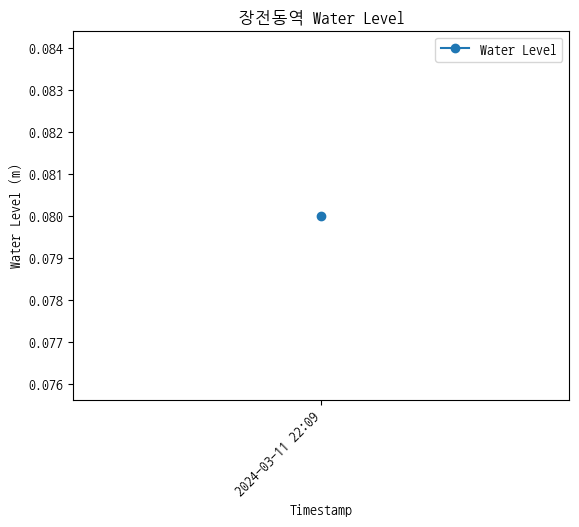

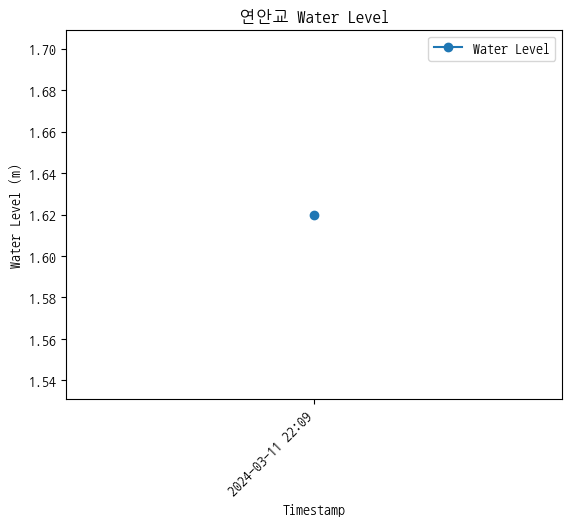

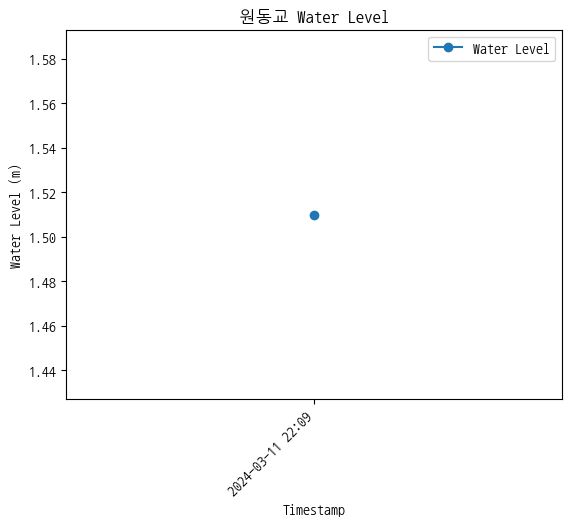

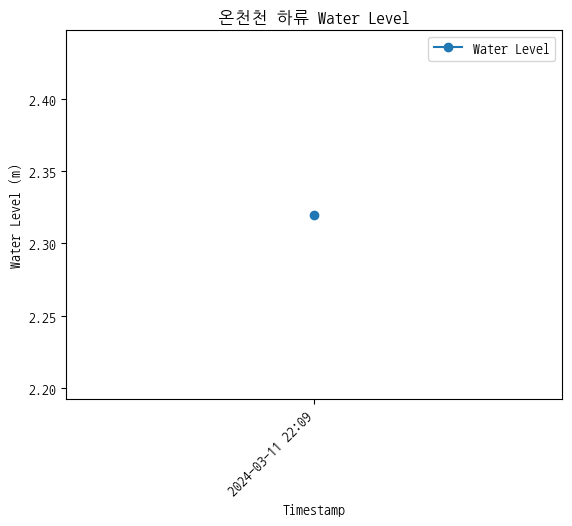

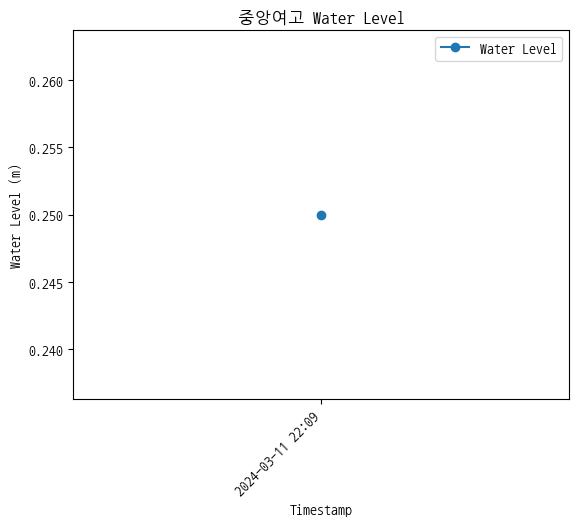

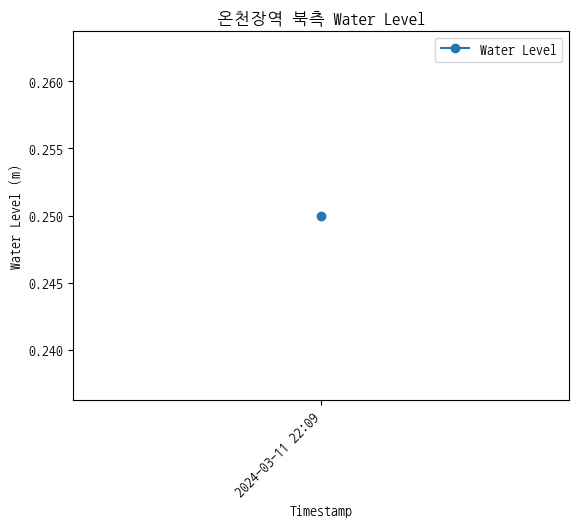

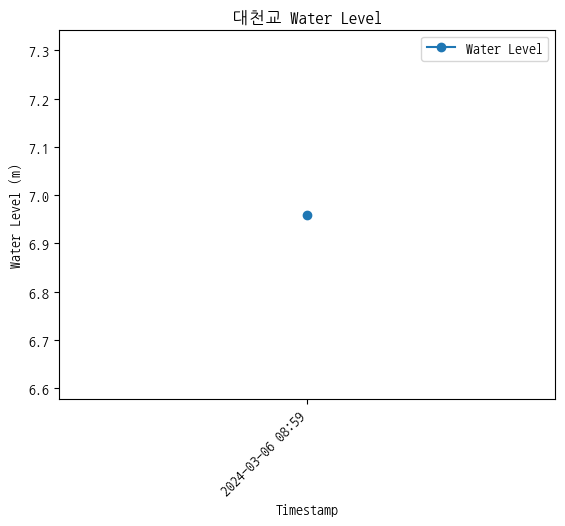

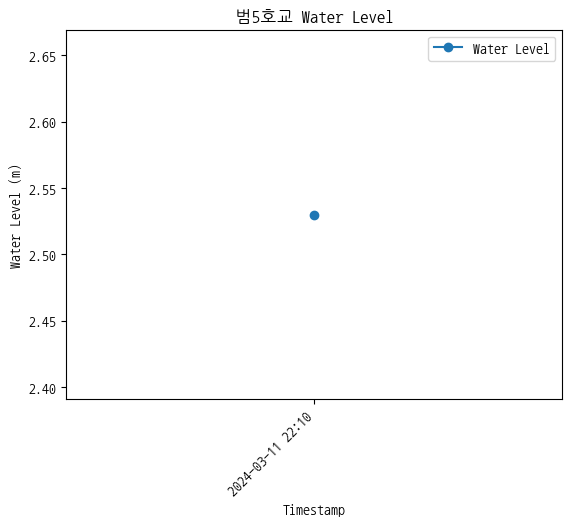

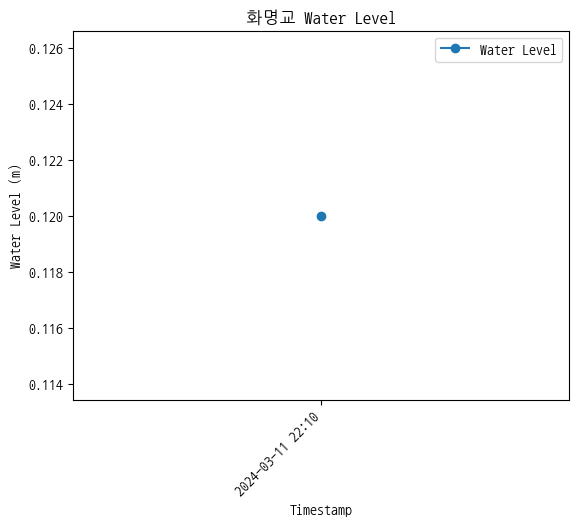

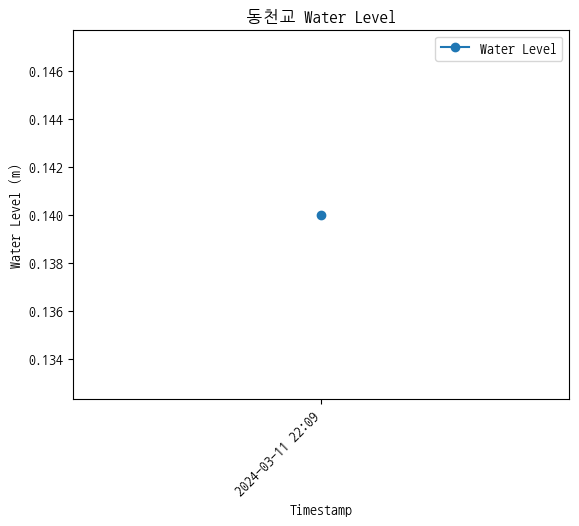

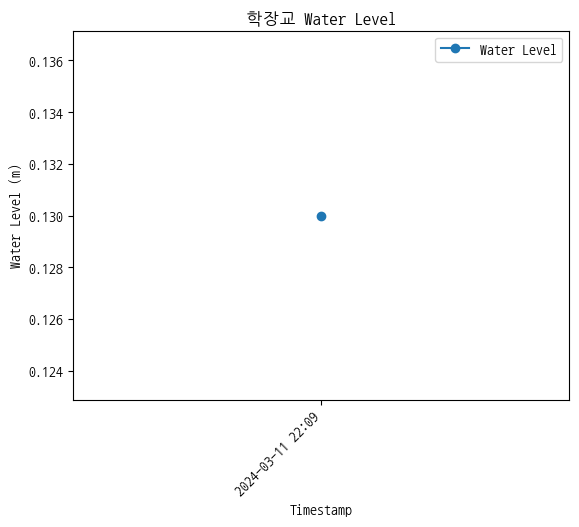

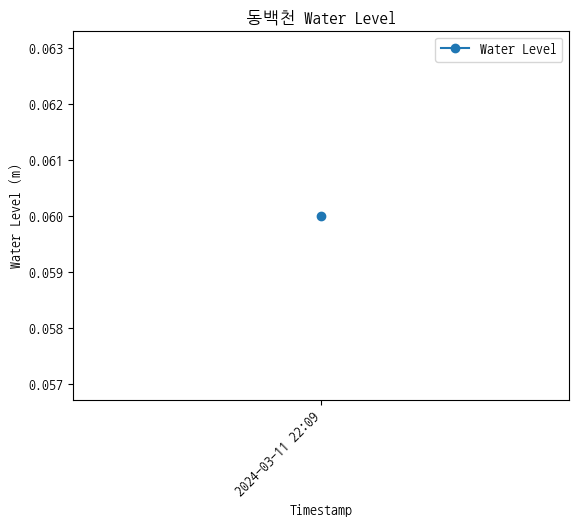

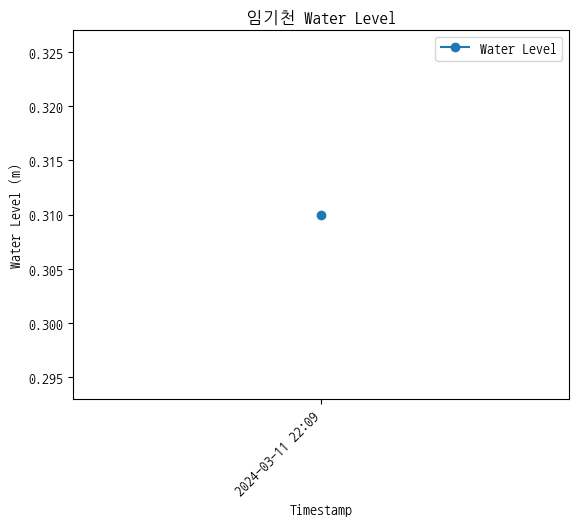

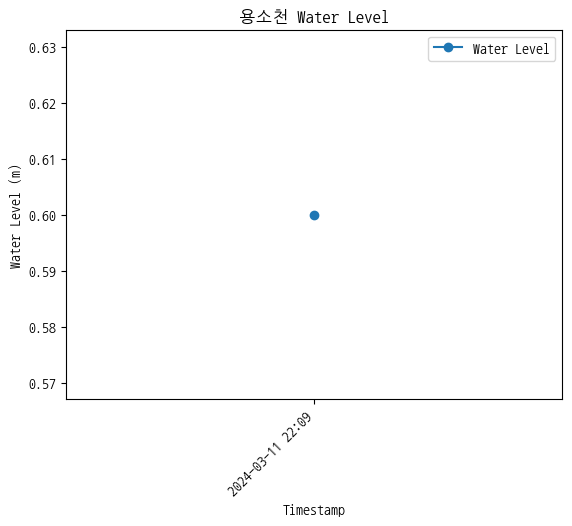

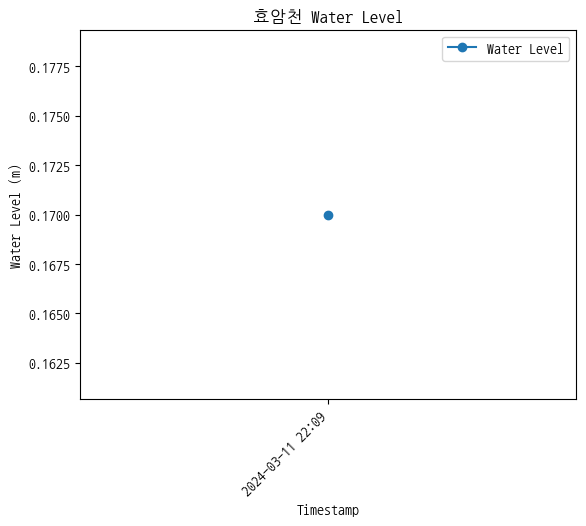

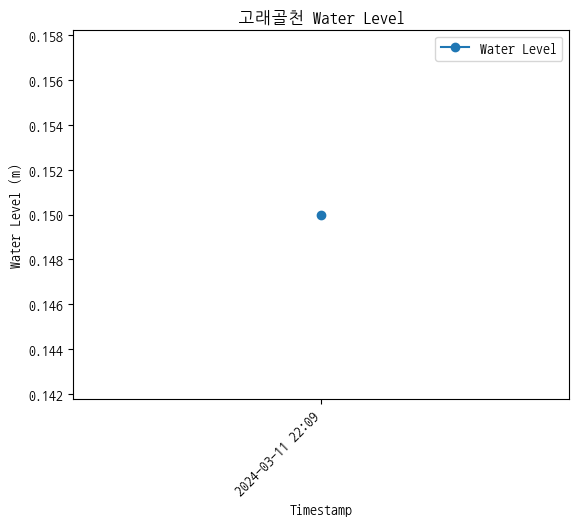

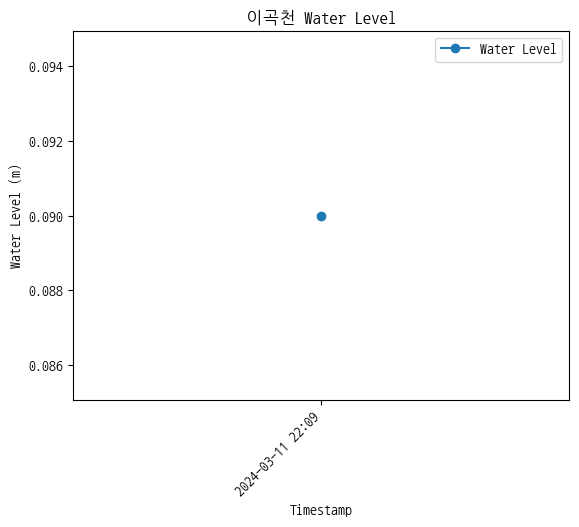

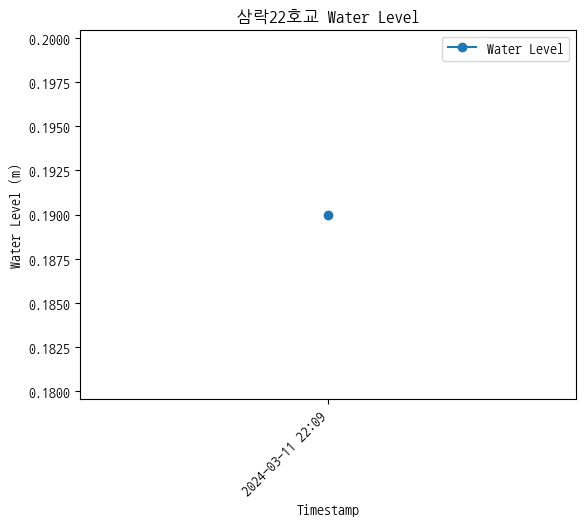

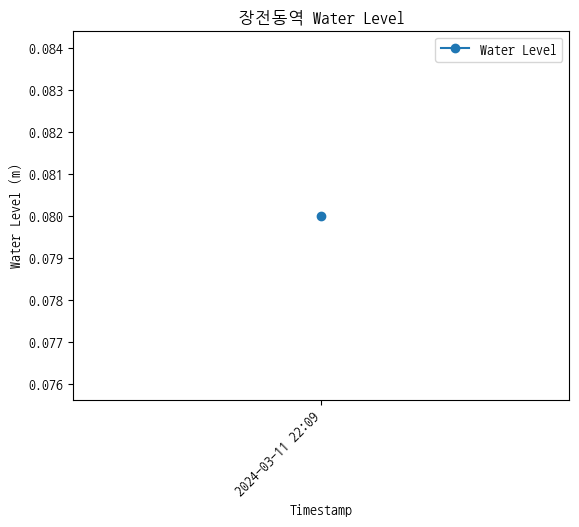

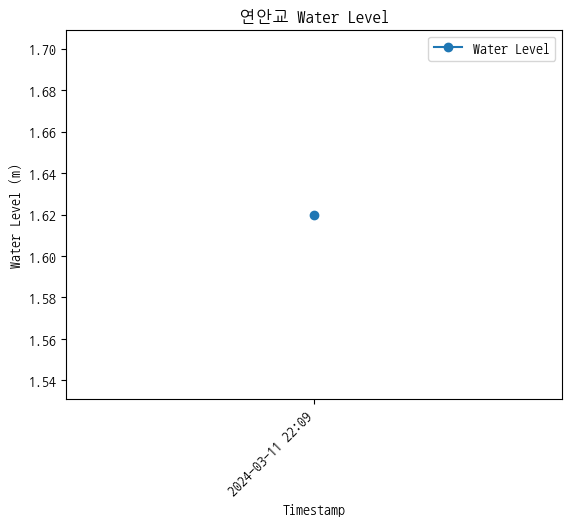

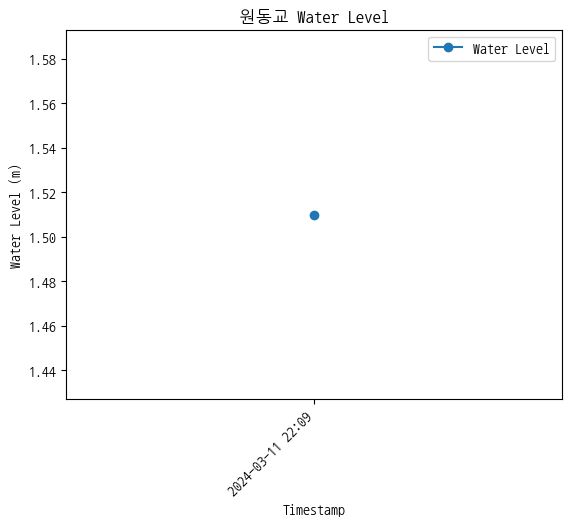

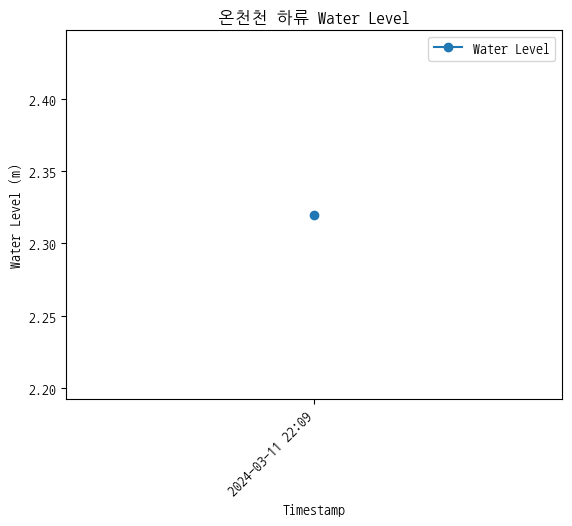

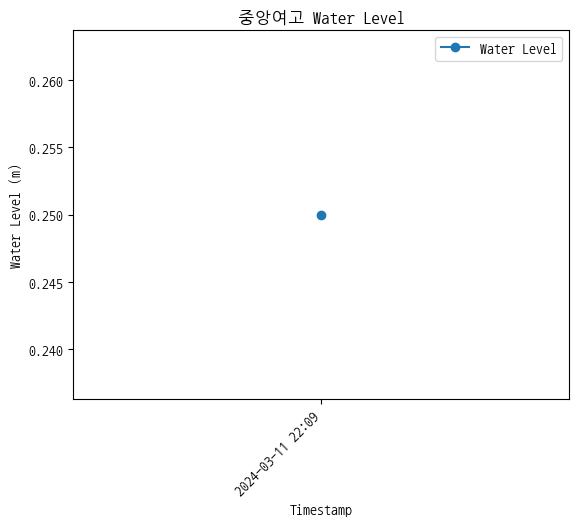

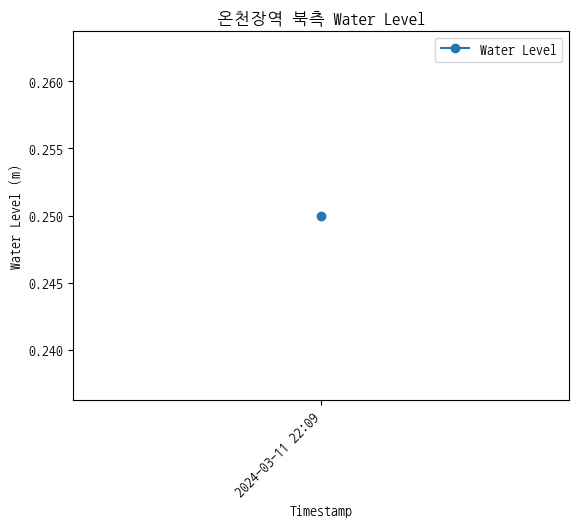

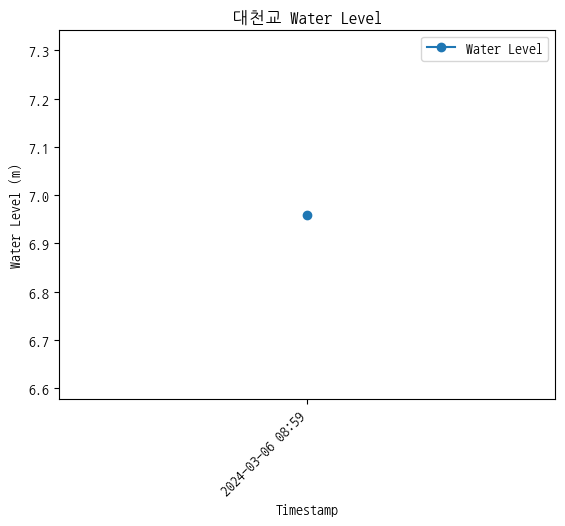

In [2]:
import json
import datetime
import requests
import matplotlib.pyplot as plt
from apscheduler.schedulers.blocking import BlockingScheduler

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False


class BusanWater:
    def __init__(self) -> None:
        pass

    def getSearchResult(self):
        url = 'http://apis.data.go.kr/6260000/BusanRvrwtLevelInfoService/getRvrwtLevelInfo'
        params = {'serviceKey': 'l2SER5UdFnVMTCfW/75Op1w1xj0ZVJyWjxZCA4s2qcMkJIjXonsQeorj8k35mmylOV0ywqc75RoXXtagwXuUnQ==',
                  'pageNo': '1', 'numOfRows': '18', 'resultType': 'json'}

        response = requests.get(url, params=params)
        if response.status_code == 200:
            decodecontent = response.content.decode('utf-8')
            return json.loads(decodecontent)
        else:
            return None


def update_charts():
    json_ob = busan.getSearchResult()

    if json_ob and 'getRvrwtLevelInfo' in json_ob and 'body' in json_ob['getRvrwtLevelInfo'] and 'items' in json_ob['getRvrwtLevelInfo']['body']:
        body = json_ob['getRvrwtLevelInfo']['body']['items']['item']

        chart_dict = {}  # siteName을 키로 사용하는 딕셔너리

        for item in body:
            site_name = item['siteName']
            timestamp_str = item['obsrTime']
            value = float(item['waterLevel'])
            timestamp = datetime.datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M")

            if site_name not in chart_dict:
                chart_dict[site_name] = {'timestamps': [], 'values': []}

            chart_dict[site_name]['timestamps'].append(timestamp)
            chart_dict[site_name]['values'].append(value)

        # 각 siteName별로 차트 생성
        for site_name, data in chart_dict.items():
            fig, ax = plt.subplots()
            ax.plot(data['timestamps'], data['values'], marker='o', linestyle='-', label='Water Level')
            ax.legend()
            ax.set_title(f'{site_name} Water Level')
            ax.set_xlabel('Timestamp')
            ax.set_ylabel('Water Level (m)')

            ax.set_xticks(data['timestamps'])
            ax.set_xticklabels([timestamp.strftime("%Y-%m-%d %H:%M") for timestamp in data['timestamps']], rotation=45, ha='right')

        plt.show()
    else:
        print("API 응답 구조가 변경되었거나 잘못된 응답입니다.")


busan = BusanWater()

# APScheduler를 사용하여 30초마다 업데이트
scheduler = BlockingScheduler()
scheduler.add_job(update_charts, 'interval', seconds=30)

try:
    scheduler.start()
except KeyboardInterrupt:
    pass
